# VAST 2018 Mini-Challenge 2 EDA

In [1]:
import pandas as pd
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
from datetime import datetime


Populating the interactive namespace from numpy and matplotlib


In [2]:
readings_df = pd.read_csv('Boonsong Lekagul waterways readings.csv')
units_df = pd.read_csv('chemical units of measure.csv', encoding = "ISO-8859-1")

Let's start by having a look at the data.

## Data
### Units Data

In [3]:
units_df.head()

,measure,unit
0,"1,2,3-Trichlorobenzene",µg/l
1,"1,2,4-Trichlorobenzene",µg/l
2,Acenaphthene,µg/l
3,Acenaphthylene,µg/l
4,AGOC-3A,µg/l


In [4]:
units_df.describe()

,measure,unit
count,106,106
unique,106,4
top,Trifluralin,µg/l
freq,1,65


So we have 106 unique measures and a corresponding unit, of which there are four types.

What are the unit types?

In [5]:
units_df.unit.value_counts()

µg/l    65
mg/l    39
C        1
         1
Name: unit, dtype: int64

So we have micro/mill grams per litre, what is probably degrees centigrade and one unknown unit. Let's check the measure in this case and for degrees centigrade.

In [6]:
units_df[units_df.unit.apply(lambda x: len(x) < 4)]

,measure,unit
58,Macrozoobenthos,
104,Water temperature,C


As predicted C corresponds to water temperature. After a quick Google it can be seen that Macrozoobenthos are "benthic animals that are big enough to be seen with the naked eye.", so presumably the number corresponds to a count of said animals.

The competition mentioned Methylosmolene as a measure that couldn't be found in the soil, let's check it's in our units.

In [7]:
units_df[units_df.measure.apply(lambda x: 'methylosmolene' in x.lower())]

,measure,unit


It's not here! I guess it couldn't be measured with the recording devices used.

Now let's have a look at the readings data.

### Readings Data

In [8]:
readings_df.head()

,id,value,location,sample date,measure
0,2221,2.00,Boonsri,11-Jan-98,Water temperature
1,2223,9.10,Boonsri,11-Jan-98,Dissolved oxygen
2,2227,0.33,Boonsri,11-Jan-98,Ammonium
3,2228,0.01,Boonsri,11-Jan-98,Nitrites
4,2229,1.47,Boonsri,11-Jan-98,Nitrates


In [9]:
readings_df.describe(include='all')

,id,value,location,sample date,measure
count,1.368240e+05,136824.000000,136824,136824,136824
unique,NaN,NaN,10,1977,106
top,NaN,NaN,Boonsri,10-May-07,Water temperature
freq,NaN,NaN,31314,485,5031
mean,1.197736e+06,24.021591,NaN,NaN,NaN
std,1.000893e+06,231.254038,NaN,NaN,NaN
min,2.221000e+03,0.000000,NaN,NaN,NaN
25%,5.147528e+05,0.059950,NaN,NaN,NaN
50%,8.891045e+05,1.862100,NaN,NaN,NaN
75%,1.640213e+06,14.100000,NaN,NaN,NaN


So we have almost 137K readings with corresponding values. As with units_df the dataset appears to be complete.

Some things to do:
 - check for outlier values
 - check distribution of locations
 - check for distrubition of dates
 - check each measure is in the units_df

Let's have a look at the sample date, when is our data coming from? Is it distributed evenly in this time?

In [10]:
readings_df['sample date dt'] = readings_df['sample date'].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))
print("Date range from {0} to {1} for a total period of {2} years." \
      .format(readings_df['sample date dt'].min().date(),
              readings_df['sample date dt'].max().date(),
              round((readings_df['sample date dt'].max()-readings_df['sample date dt'].min()).days/365.25)))

Date range from 1998-01-11 to 2016-12-31 for a total period of 19 years.


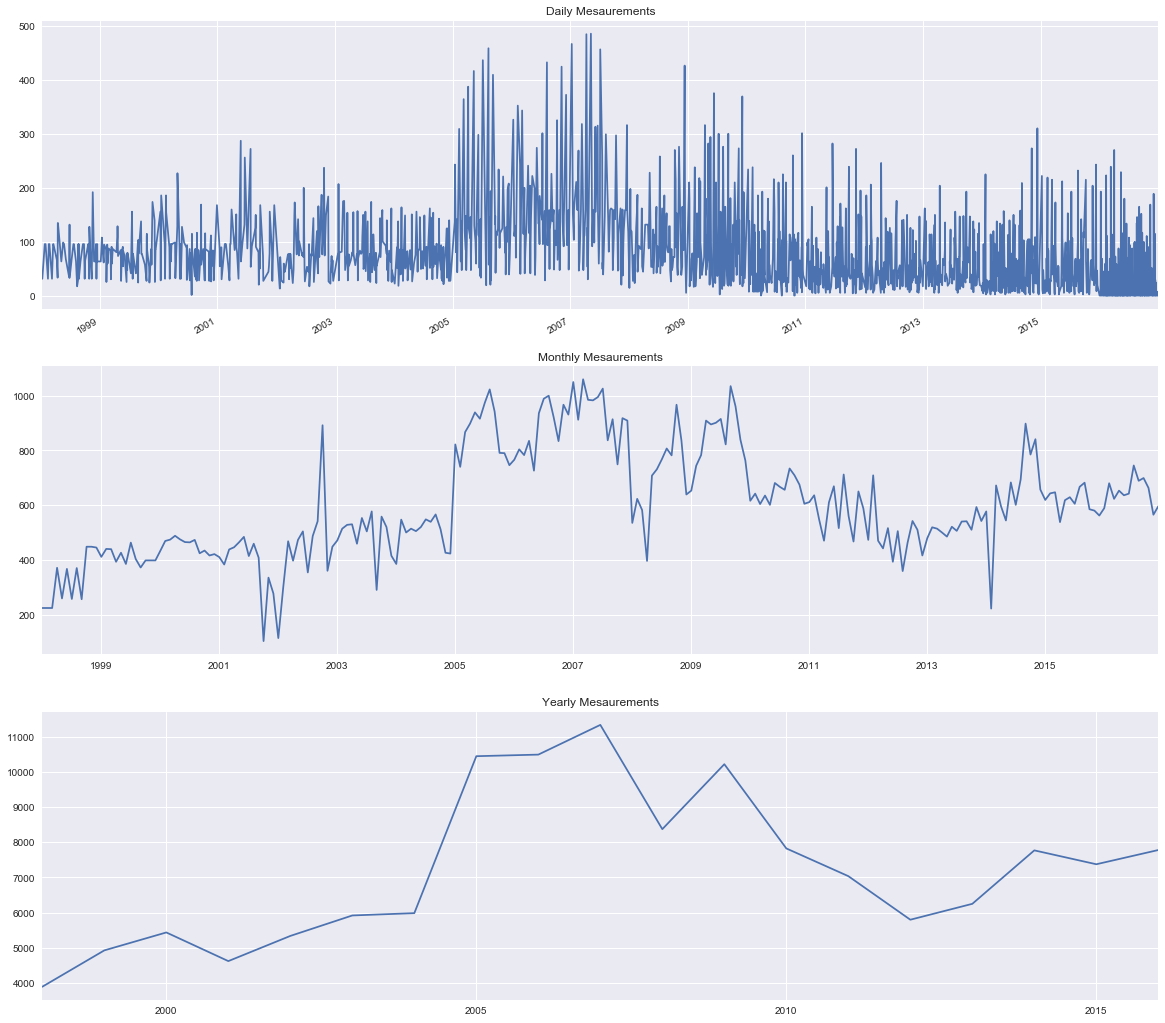

In [11]:
fig, ax = pyplot.subplots(3,figsize=(20, 20))
sns.plt.subplot(311)
ax = readings_df['sample date dt'].value_counts().sort_index(ascending=True).plot(kind='line')
ax.set_title('Daily Mesaurements')
sns.plt.subplot(312)
ax = readings_df['sample date dt'].apply(lambda x: x.replace(day=1)).value_counts().sort_index(ascending=True).plot(kind='line')
ax.set_title('Monthly Mesaurements')
sns.plt.subplot(313)
ax = readings_df['sample date dt'].apply(lambda x: x.replace(month=1, day=1)).value_counts().sort_index(ascending=True).plot(kind='line')
ax.set_title('Yearly Mesaurements')

So we can see that measurements definitely started to pick up at the start of 2005 for 5 years before coming back down to a similar level in 2010. Potentially there was a project funded for a certain time, or a new site openend and closed.

The relationship with the other variables should be further investigated.

Let's next look at the measures. Do we have more data for certain measures?

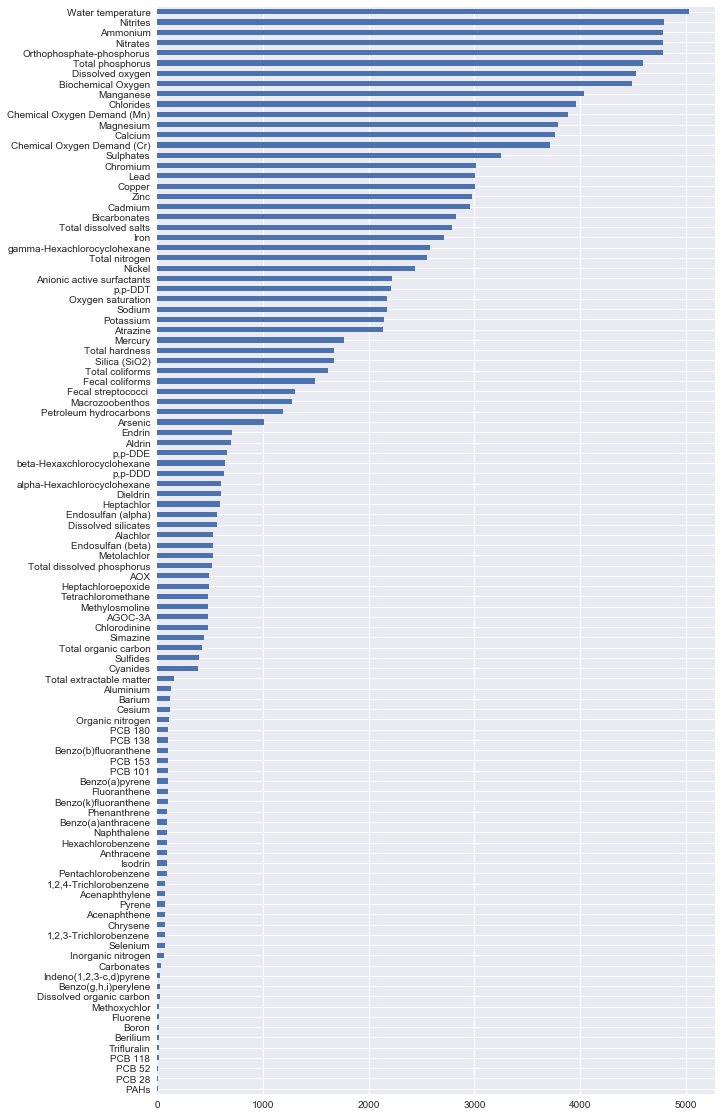

In [12]:
fig = plt.figure(figsize=(10,20))
readings_df.measure.value_counts(ascending=True).plot(kind='barh')
sns.plt.show()

So we can see here that the measures aren't distributed nicely. Though it does seem there is some pattern with batches of distrubitons.

Why do we have such disparity in readings? Are some taken less regularly? Did measurements stop or start being taken at some point in time? Let's plot the measurements on an x-y plot with date.

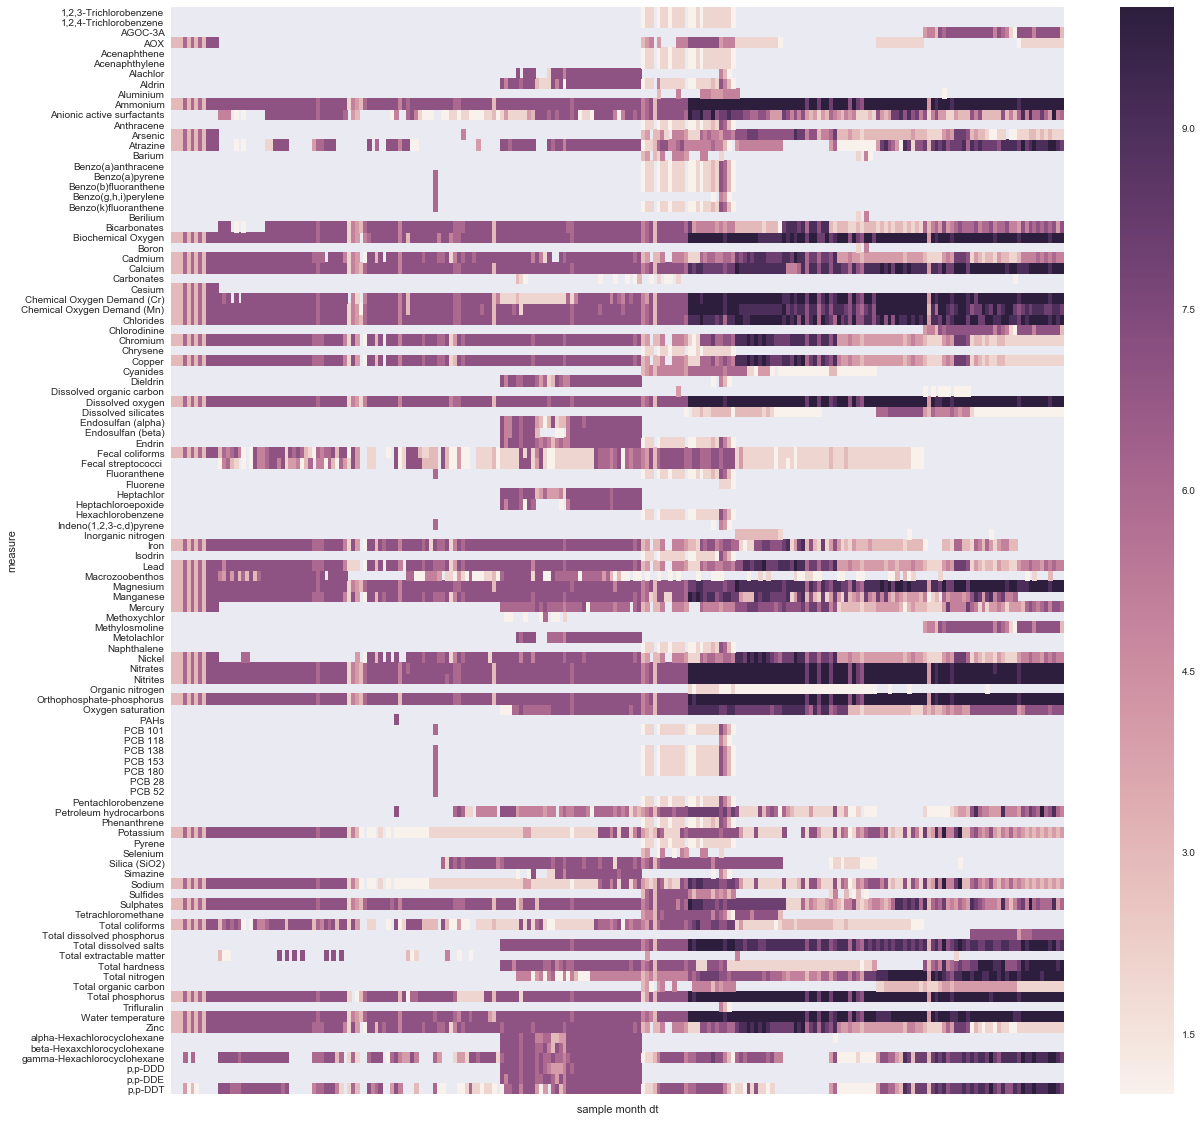

In [13]:
readings_df['sample month dt'] = readings_df['sample date dt'].apply(lambda x: x.replace(day=1))
fig, ax = pyplot.subplots(figsize=(20, 20))
sns.heatmap(readings_df.groupby(['measure', 'sample month dt']).location.nunique().unstack(level=1).sort_index(), ax=ax)
ax.axes.get_xaxis().set_ticklabels([])
sns.plt.show()

So this graph reveals some interesting information.
 - Some measures have almost always been collected, e.g. Water temperature, Zinc, Ammonium across multiple sites.
 - At certain points in time, for short periods, some measures were collected in detail, e.g. alpha/beta-Hexaxchlorocyclohexane. This explains the batches of measurements we noticed in the previous plot.
 - In time, the number of sites where data is collected has increased. For the typical measures it was around 7 but for the last half of the date range, all 10 sites have data.

We can do the same with locations.

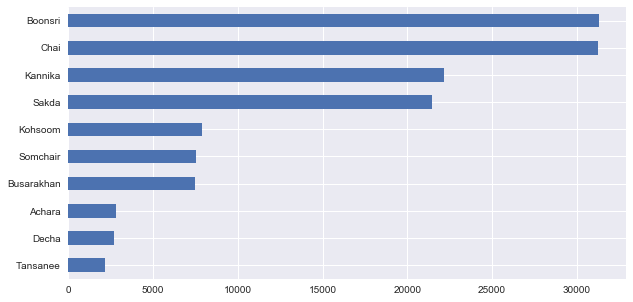

In [14]:
fig = plt.figure(figsize=(10,5))
readings_df.location.value_counts(ascending=True).plot(kind='barh')
sns.plt.show()

We can see that Boonsri and Chai are the mest popular measurement sites followed by Kannika and Sakda.

How are these distributed in time?

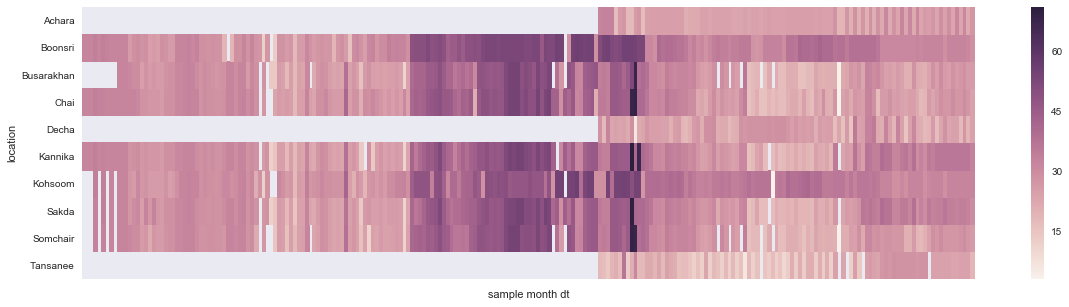

In [15]:
readings_df['sample month dt'] = readings_df['sample date dt'].apply(lambda x: x.replace(day=1))
fig, ax = pyplot.subplots(figsize=(20, 5))
sns.heatmap(readings_df.groupby(['location', 'sample month dt']).measure.nunique().unstack(level=1).sort_index(), ax=ax)
ax.axes.get_xaxis().set_ticklabels([])
sns.plt.show()

Interestingly, Boonsri and Chai are not the only sites to have measurements collected throughout time, at least 5 other sites have this as well, so the number of measurements collected must be less here.

Here we can clearly see that Tansanee, Decha and Achara, only started having measurements collected towards the end of the period - let's get the dates too.

In [16]:
readings_df.groupby(['location'])['sample date dt'].first().sort_values()

location
Boonsri      1998-01-11
Kannika      1998-01-26
Chai         1998-01-31
Kohsoom      1998-04-16
Somchair     1998-04-17
Sakda        1998-04-18
Busarakhan   1998-10-29
Tansanee     2009-01-12
Achara       2009-01-15
Decha        2009-01-21
Name: sample date dt, dtype: datetime64[ns]

This shows that the Boonsri, Kannika and Chai were all launched around the same time, followed by Kohsoom, Somchair and Sakda. Busarakhan was launched on its own to fround off those all launched within 9 months. The remaining 3 were launched ~10 years later in Jan 2009.